# Merge exploration between Porcentage of E-Commerce Sales and Purchases by Individuals

In [161]:
%run cleaning_ecommerce_sales.ipynb
%run cleaning_purchases_individuals.ipynb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import functions
import dictionaries

df_cat, df_all = import_df_ecommerce() # type: ignore
df_purchases_cleaned_v3, df_per_region = import_df() # type: ignore


/var/folders/x5/xrbwdz1510vcx8w5dcdp2s7m0000gn/T/ipykernel_98593/2595952571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_all.drop(columns=["size_emp"], inplace=True) # Delete size column as there is only one size in DF


In [162]:
df_per_region["last_online_purchase"].unique()
df_sales_all = df_per_region[(df_per_region["grouped_individuals"] == "All individuals") & (df_per_region["last_online_purchase"] == "in the 12 months")]
df_sales_all.drop(columns=["last_online_purchase", "grouped_individuals"], inplace=True)
df_sales_all

/var/folders/x5/xrbwdz1510vcx8w5dcdp2s7m0000gn/T/ipykernel_98593/3600685232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_all.drop(columns=["last_online_purchase", "grouped_individuals"], inplace=True)


,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,region
1007,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.32,7.06,14.43,17.18,29.75,32.98,NaN,Eastern Europe
1008,Austria,42.47,44.49,48.48,53.99,53.33,57.70,57.59,61.56,60.30,62.41,66.30,63.17,65.65,72.17,70.73,Western Europe
1009,Belgium,38.44,43.39,45.13,47.61,54.24,55.24,56.82,59.63,60.52,66.16,72.72,75.19,74.83,75.26,76.43,Western Europe
1010,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.17,22.73,27.96,29.95,NaN,34.71,43.91,Eastern Europe
1011,Bulgaria,5.07,6.66,9.24,12.15,16.58,18.48,16.77,17.73,20.76,21.71,30.95,33.04,40.54,45.19,49.78,Eastern Europe
1012,Croatia,14.13,17.11,23.08,26.40,27.66,31.38,33.24,28.78,35.21,45.30,55.01,57.35,56.15,59.14,59.30,Eastern Europe
1013,Cyprus,17.86,20.96,21.39,24.66,26.90,23.26,29.12,31.91,32.25,38.63,47.19,54.01,50.06,56.83,64.57,Southern Europe
1014,Czechia,27.36,30.19,32.81,36.39,42.51,45.32,47.38,55.58,58.59,64.00,71.64,75.48,77.00,77.68,81.24,Central Europe
1015,Denmark,67.50,69.98,73.37,77.42,77.69,78.88,81.52,80.19,84.39,84.15,89.31,90.82,88.30,89.01,90.86,Northern Europe
1016,Estonia,17.24,20.43,23.15,23.20,48.56,58.91,56.45,58.16,61.26,68.24,68.43,70.32,70.83,73.12,73.06,Eastern Europe


In [163]:
df_all_years = df_all.pivot(index=["region", "country"], columns="year", values="sales").reset_index()
df_all_years

year,region,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Central Europe,Czechia,19.63,25.83,24.74,25.72,26.54,23.69,26.59,23.95,24.34,29.21,29.65,24.54,23.78,23.59,22.80
1,Central Europe,Hungary,7.51,9.71,9.80,9.98,10.27,10.55,12.18,12.96,12.58,13.03,13.96,18.58,20.94,22.43,21.86
2,Central Europe,Poland,7.99,8.49,9.04,8.98,9.87,10.24,10.66,10.21,12.56,13.66,14.18,14.79,14.52,14.83,14.71
3,Central Europe,Slovakia,6.62,13.25,12.16,17.57,11.92,13.21,12.22,15.42,13.34,12.34,17.46,14.18,14.89,15.24,14.91
4,Central Europe,Slovenia,10.31,11.30,13.87,11.15,14.28,16.27,14.02,18.49,17.82,17.95,18.30,19.92,20.22,18.05,20.43
5,Eastern Europe,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.54,20.74,19.15,20.10,23.51,22.94,23.92
6,Eastern Europe,Bulgaria,3.60,3.15,4.23,4.76,5.58,5.84,5.39,7.26,5.70,7.41,8.31,10.48,11.46,13.31,12.92
7,Eastern Europe,Croatia,22.37,18.26,23.04,NaN,NaN,19.55,18.61,17.70,18.18,21.90,30.72,29.75,29.73,30.04,32.03
8,Eastern Europe,Estonia,10.28,11.09,11.23,10.44,12.34,12.52,15.71,15.81,16.13,17.72,16.89,18.66,19.19,18.02,20.53
9,Eastern Europe,Latvia,5.67,8.95,7.32,7.49,7.10,8.59,8.35,10.80,10.67,11.29,11.80,14.61,15.87,17.43,16.95


## Merge of Sales and Purchases dataframes

In [164]:
df_merge = df_all_years.merge(df_sales_all, how="right", on=["region", "country"])
df_merge

# YYYY_x = E-Commerce Sales
# YYYY_y = Purchases

,region,country,2010_x,2011_x,2012_x,2013_x,2014_x,2015_x,2016_x,2017_x,...,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y,2023_y,2024_y
0,Eastern Europe,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.32,7.06,14.43,17.18,29.75,32.98,NaN
1,Western Europe,Austria,13.86,11.10,10.98,12.58,13.27,14.59,15.26,17.23,...,57.70,57.59,61.56,60.30,62.41,66.30,63.17,65.65,72.17,70.73
2,Western Europe,Belgium,25.53,21.92,22.79,20.70,22.95,24.57,23.95,24.27,...,55.24,56.82,59.63,60.52,66.16,72.72,75.19,74.83,75.26,76.43
3,Eastern Europe,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.17,22.73,27.96,29.95,NaN,34.71,43.91
4,Eastern Europe,Bulgaria,3.60,3.15,4.23,4.76,5.58,5.84,5.39,7.26,...,18.48,16.77,17.73,20.76,21.71,30.95,33.04,40.54,45.19,49.78
5,Eastern Europe,Croatia,22.37,18.26,23.04,NaN,NaN,19.55,18.61,17.70,...,31.38,33.24,28.78,35.21,45.30,55.01,57.35,56.15,59.14,59.30
6,Southern Europe,Cyprus,6.82,6.99,7.62,7.29,10.46,10.60,12.67,11.71,...,23.26,29.12,31.91,32.25,38.63,47.19,54.01,50.06,56.83,64.57
7,Central Europe,Czechia,19.63,25.83,24.74,25.72,26.54,23.69,26.59,23.95,...,45.32,47.38,55.58,58.59,64.00,71.64,75.48,77.00,77.68,81.24
8,Northern Europe,Denmark,25.09,22.92,26.48,27.14,26.37,26.04,27.72,28.53,...,78.88,81.52,80.19,84.39,84.15,89.31,90.82,88.30,89.01,90.86
9,Eastern Europe,Estonia,10.28,11.09,11.23,10.44,12.34,12.52,15.71,15.81,...,58.91,56.45,58.16,61.26,68.24,68.43,70.32,70.83,73.12,73.06


In [165]:
sales_columns = [col for col in df_all_years.columns if col not in ["region", "country"]]
purchases_columns = [col for col in df_sales_all if col not in ["region", "country"]]

# print(sales_columns)
# print(purchases_columns)

temporary_columns = df_merge.columns
temporary_columns = temporary_columns.drop(["region", "country"])
temporary_columns = temporary_columns.to_list()
print(temporary_columns)

def ratio_func(x, y):
    if pd.isna(x) or pd.isna(y):
        return np.nan
    if y == 0:
        return np.nan
    return round(x / y, 2)

for col1, col2 in zip(sales_columns, purchases_columns):
    # print(col1, col2)
    new_col_name = col1
    df_merge[new_col_name] = df_merge.apply(lambda row: ratio_func(row[f"{col1}_x"], row[f"{col2}_y"]), axis=1)
    
df_merge.drop(columns=temporary_columns, inplace=True)

df_merge


['2010_x', '2011_x', '2012_x', '2013_x', '2014_x', '2015_x', '2016_x', '2017_x', '2018_x', '2019_x', '2020_x', '2021_x', '2022_x', '2023_x', '2024_x', '2010_y', '2011_y', '2012_y', '2013_y', '2014_y', '2015_y', '2016_y', '2017_y', '2018_y', '2019_y', '2020_y', '2021_y', '2022_y', '2023_y', '2024_y']


,region,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Eastern Europe,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Western Europe,Austria,0.33,0.25,0.23,0.23,0.25,0.25,0.26,0.28,0.24,0.31,0.34,0.36,0.33,0.29,0.36
2,Western Europe,Belgium,0.66,0.51,0.50,0.43,0.42,0.44,0.42,0.41,0.48,0.45,0.35,0.41,0.39,0.40,0.41
3,Eastern Europe,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19,0.91,0.68,0.67,NaN,0.66,0.54
4,Eastern Europe,Bulgaria,0.71,0.47,0.46,0.39,0.34,0.32,0.32,0.41,0.27,0.34,0.27,0.32,0.28,0.29,0.26
5,Eastern Europe,Croatia,1.58,1.07,1.00,NaN,NaN,0.62,0.56,0.62,0.52,0.48,0.56,0.52,0.53,0.51,0.54
6,Southern Europe,Cyprus,0.38,0.33,0.36,0.30,0.39,0.46,0.44,0.37,0.38,0.33,0.31,0.32,0.40,0.37,0.33
7,Central Europe,Czechia,0.72,0.86,0.75,0.71,0.62,0.52,0.56,0.43,0.42,0.46,0.41,0.33,0.31,0.30,0.28
8,Northern Europe,Denmark,0.37,0.33,0.36,0.35,0.34,0.33,0.34,0.36,0.37,0.40,0.43,0.42,0.40,0.41,0.42
9,Eastern Europe,Estonia,0.60,0.54,0.49,0.45,0.25,0.21,0.28,0.27,0.26,0.26,0.25,0.27,0.27,0.25,0.28


In [166]:
# Display by regions
df_merge_regions = df_merge.groupby(["region"]).mean(numeric_only=True).round(2)
df_merge_regions

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
region,,,,,,,,,,,,,,,
Central Europe,0.40,0.46,0.42,0.41,0.37,0.36,0.34,0.33,0.31,0.30,0.29,0.26,0.27,0.26,0.26
Eastern Europe,1.14,0.78,0.70,0.61,0.45,0.40,0.39,0.56,0.55,0.54,0.42,0.40,0.37,0.41,0.40
Northern Europe,0.38,0.36,0.40,0.35,0.34,0.36,0.34,0.36,0.36,0.37,0.32,0.35,0.39,0.35,0.38
Southern Europe,0.72,0.42,0.40,0.34,0.38,0.43,0.45,0.39,0.37,0.34,0.35,0.34,0.38,0.37,0.36
Western Europe,0.36,0.30,0.29,0.27,0.24,0.27,0.27,0.26,0.27,0.27,0.25,0.26,0.26,0.25,0.28


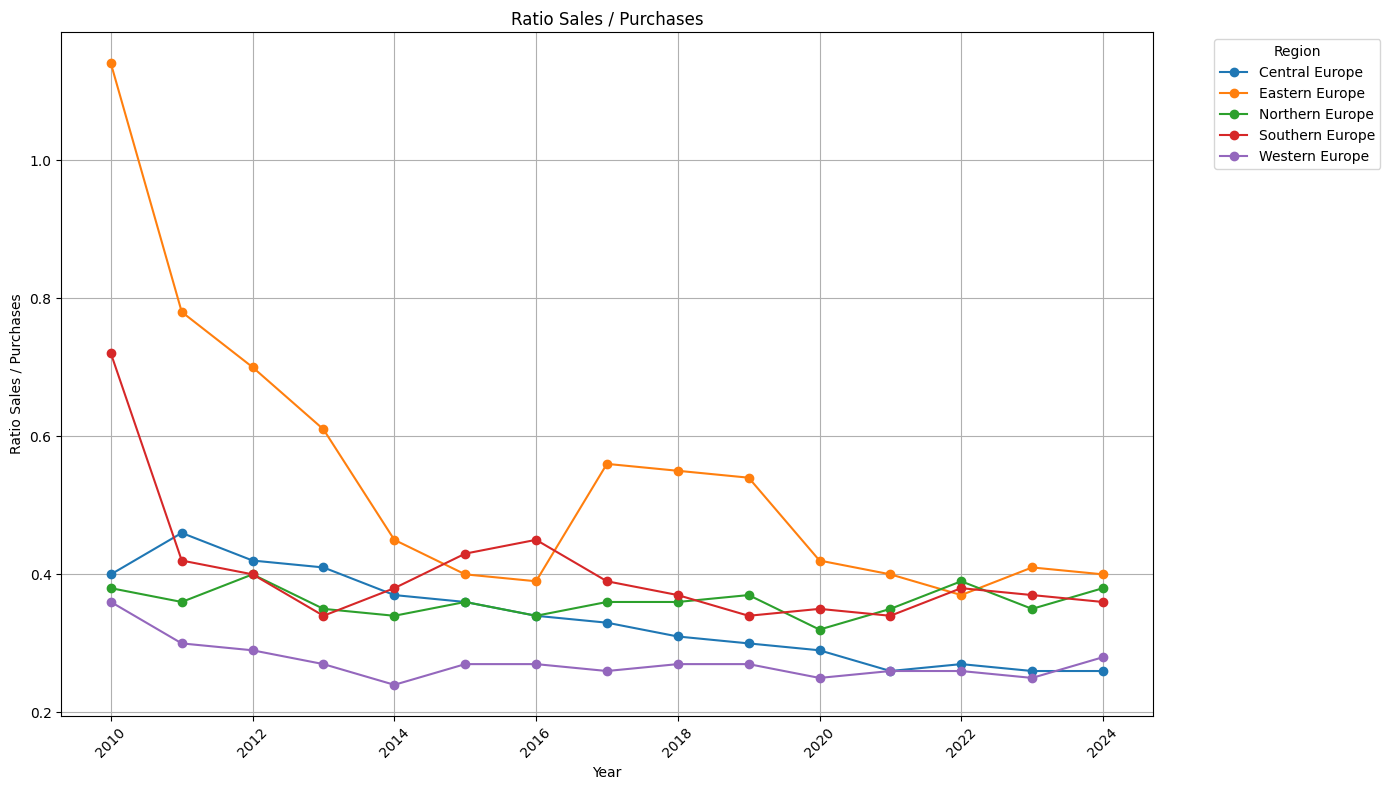

In [167]:
# Preprocess for plotting
df_transposed = df_merge_regions.T # transposing DF to have years as rows and country as columns
df_transposed.index = df_transposed.index.astype(int) # Convert the index (years) to integers for proper plotting /!\

# Plot the data
functions.plot_line_chart(
    df_transposed,
    'Year', 
    f'Ratio Sales / Purchases', 
    f'Ratio Sales / Purchases',
    'Region',
    )